In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [3]:
df_togo = pd.read_csv('c:/Users/deres/OneDrive/Desktop/week0/Kifiya/data/togo-dapaong_qc.csv')


In [4]:
summary_stats = df_togo.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [5]:
missing_counts = df_togo.isna().sum()
print("\nMissing values per column:\n", missing_counts)



Missing values per column:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
total_rows = len(df_togo)
cols_over_5pct_null = missing_counts[missing_counts > 0.05 * total_rows].index.tolist()

print(f"\nColumns with >5% missing values: {cols_over_5pct_null}")



Columns with >5% missing values: ['Comments']


In [7]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [8]:
print("Missing values in key columns:")
print(df_togo[cols_to_check].isna().sum())


Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [9]:


# Compute Z-scores ignoring NaNs
z_scores = df_togo[cols_to_check].apply(zscore, nan_policy='omit')

# Flag rows with any outlier
outliers = (np.abs(z_scores) > 3)
print(f"\nNumber of rows flagged as outliers in any key column: {outliers.any(axis=1).sum()}")



Number of rows flagged as outliers in any key column: 9251


In [10]:
for col in cols_to_check:
    median_val = df_togo[col].median()
    df_togo[col].fillna(median_val, inplace=True)


C:\Users\deres\AppData\Local\Temp\ipykernel_19880\1378385592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_togo[col].fillna(median_val, inplace=True)
C:\Users\deres\AppData\Local\Temp\ipykernel_19880\1378385592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [11]:
df_togo_clean = df_togo[~outliers.any(axis=1)].copy()
print(f"\nShape after dropping outliers: {df_togo_clean.shape}")



Shape after dropping outliers: (516349, 19)


In [12]:
df_togo_clean.to_csv('c:/Users/deres/OneDrive/Desktop/week0/Kifiya/data/togo_clean.csv', index=False)
print("Cleaned data exported.")


Cleaned data exported.


In [13]:
df_togo_clean['Timestamp'] = pd.to_datetime(df_togo_clean['Timestamp'])


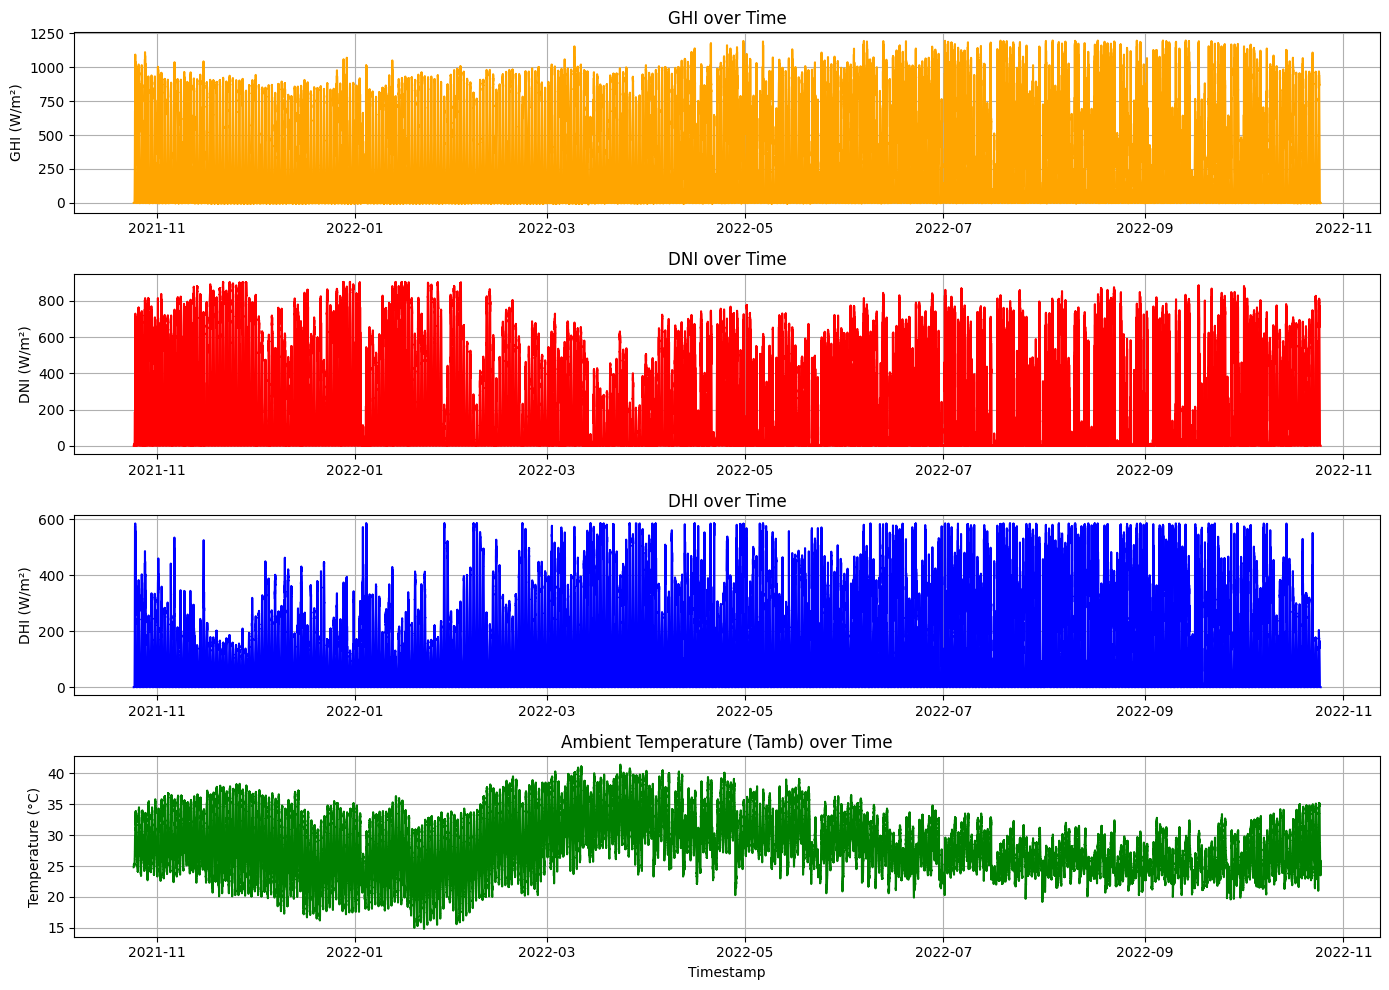

In [14]:
import matplotlib.dates as mdates

plt.figure(figsize=(14,10))

plt.subplot(4,1,1)
plt.plot(df_togo_clean['Timestamp'], df_togo_clean['GHI'], color='orange')
plt.title('GHI over Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(df_togo_clean['Timestamp'], df_togo_clean['DNI'], color='red')
plt.title('DNI over Time')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(df_togo_clean['Timestamp'], df_togo_clean['DHI'], color='blue')
plt.title('DHI over Time')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(df_togo_clean['Timestamp'], df_togo_clean['Tamb'], color='green')
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()


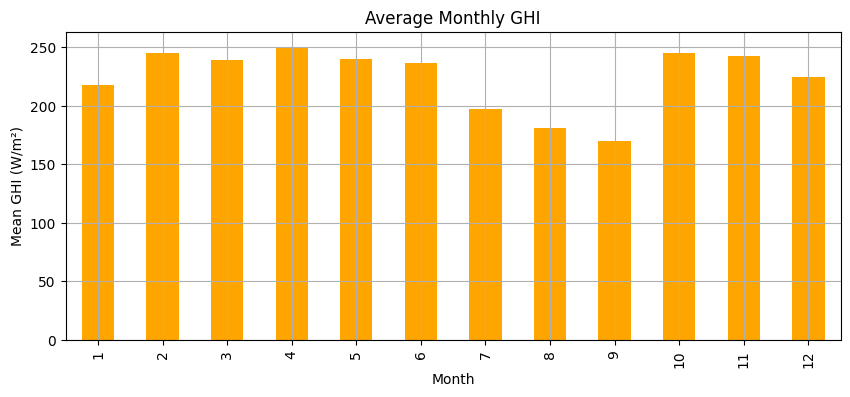

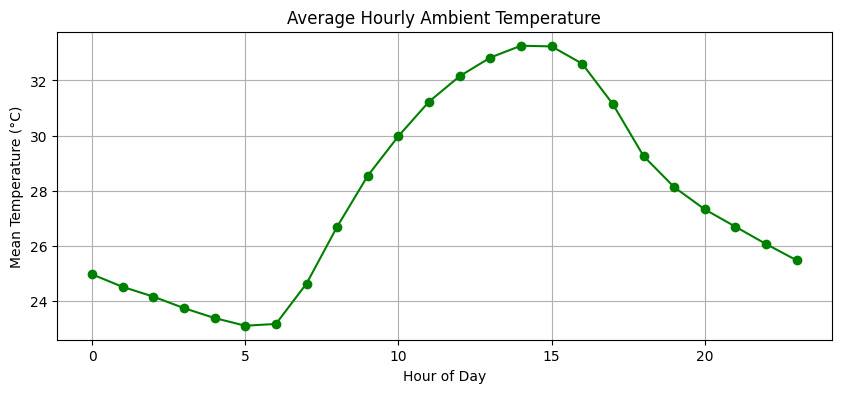

In [15]:
df_togo_clean['Month'] = df_togo_clean['Timestamp'].dt.month
df_togo_clean['Hour'] = df_togo_clean['Timestamp'].dt.hour

# Monthly mean GHI
monthly_ghi = df_togo_clean.groupby('Month')['GHI'].mean()
plt.figure(figsize=(10,4))
monthly_ghi.plot(kind='bar', color='orange')
plt.title('Average Monthly GHI')
plt.xlabel('Month')
plt.ylabel('Mean GHI (W/m²)')
plt.grid(True)
plt.show()

# Average hourly temperature (Tamb)
hourly_temp = df_togo_clean.groupby('Hour')['Tamb'].mean()
plt.figure(figsize=(10,4))
hourly_temp.plot(kind='line', marker='o', color='green')
plt.title('Average Hourly Ambient Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.show()


[0 1]
                ModA        ModB
Cleaning                        
0         219.217037  212.861920
1         528.864835  527.268498


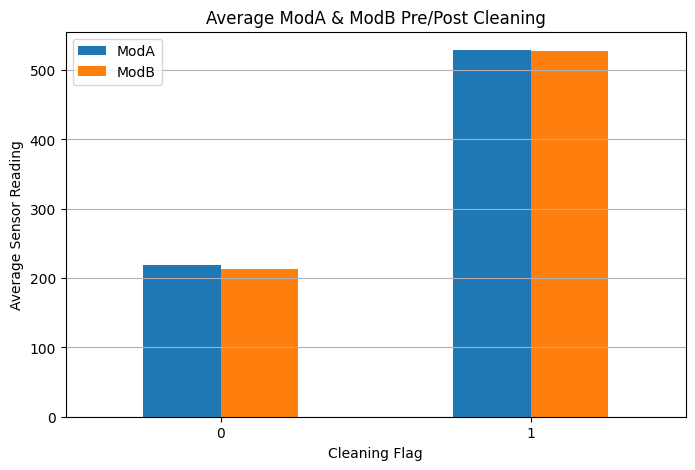

In [16]:
# Check if Cleaning flag exists and its unique values
print(df_togo_clean['Cleaning'].unique())

# Group by Cleaning flag and calculate mean ModA and ModB
cleaning_group = df_togo_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_group)

# Plot the averages
cleaning_group.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


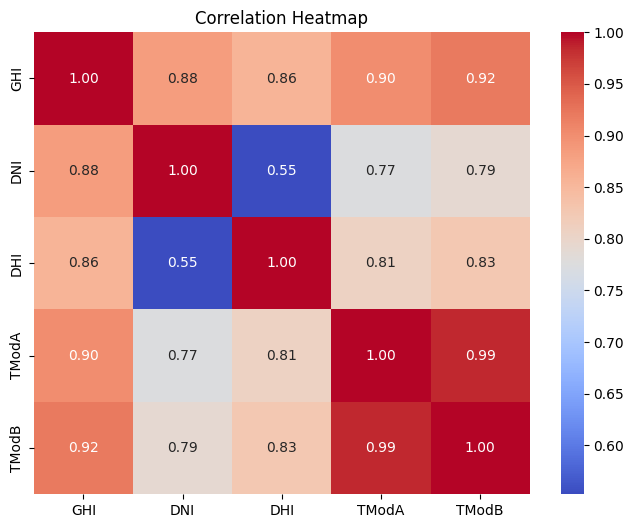

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate correlation matrix
corr_matrix = df_togo_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\deres\AppData\Local\Temp\ipykernel_19880\2181861191.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\deres\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


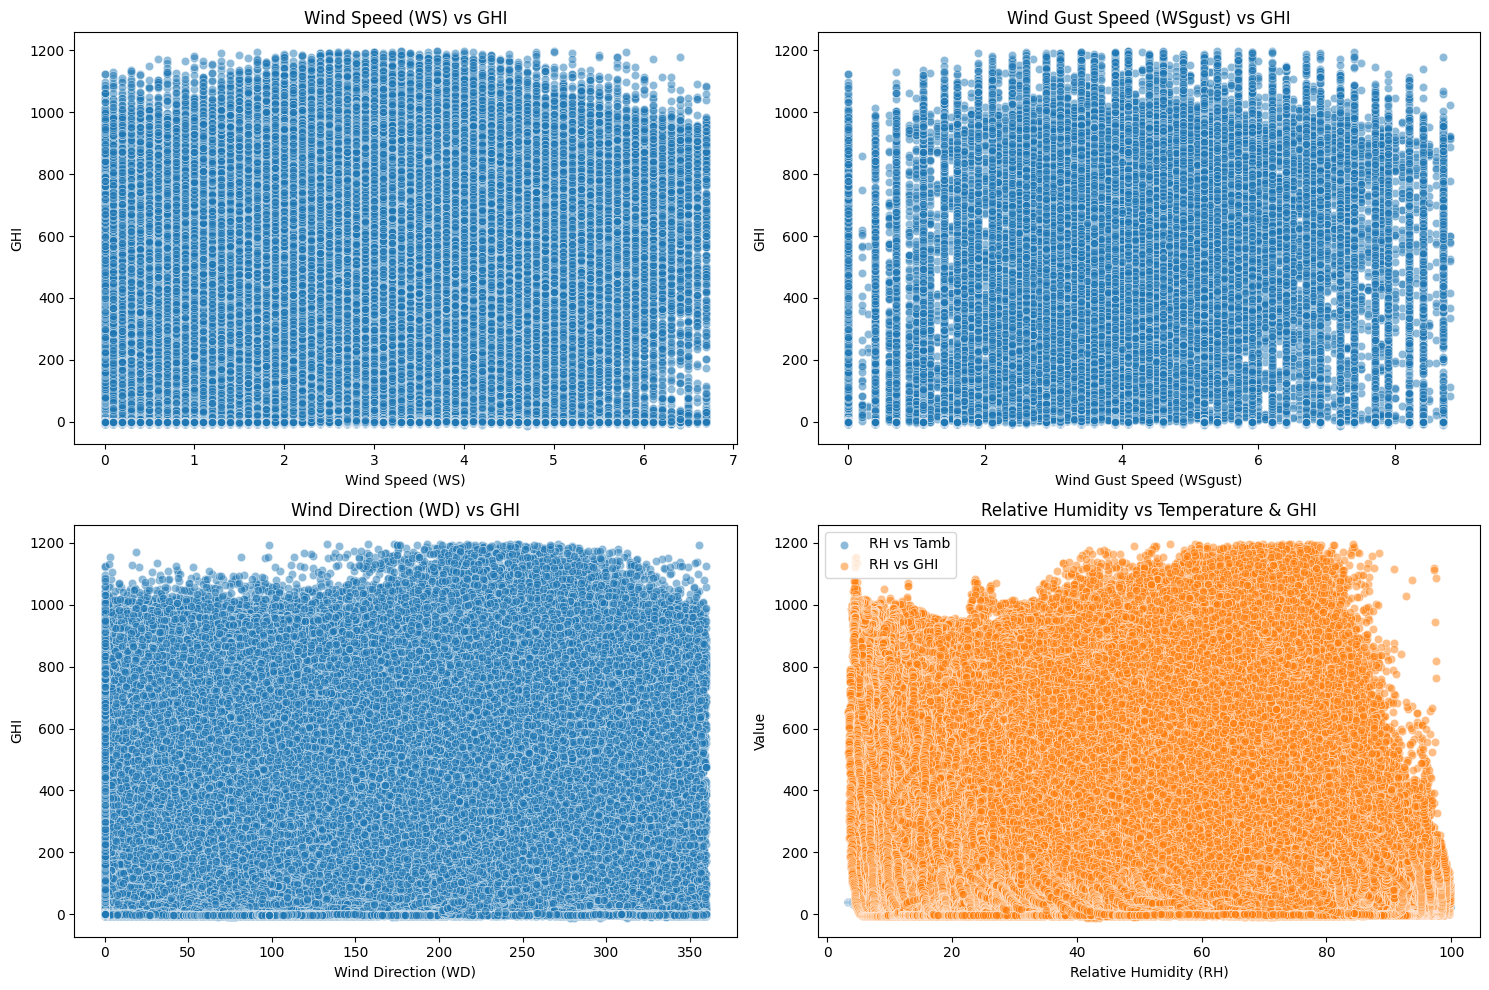

In [18]:
plt.figure(figsize=(15,10))

# WS vs GHI
plt.subplot(2,2,1)
sns.scatterplot(data=df_togo_clean, x='WS', y='GHI', alpha=0.5)
plt.title('Wind Speed (WS) vs GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')

# WSgust vs GHI
plt.subplot(2,2,2)
sns.scatterplot(data=df_togo_clean, x='WSgust', y='GHI', alpha=0.5)
plt.title('Wind Gust Speed (WSgust) vs GHI')
plt.xlabel('Wind Gust Speed (WSgust)')
plt.ylabel('GHI')

# WD vs GHI
plt.subplot(2,2,3)
sns.scatterplot(data=df_togo_clean, x='WD', y='GHI', alpha=0.5)
plt.title('Wind Direction (WD) vs GHI')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')

# RH vs Tamb and RH vs GHI (two plots side by side)
plt.subplot(2,2,4)
sns.scatterplot(data=df_togo_clean, x='RH', y='Tamb', alpha=0.5, label='RH vs Tamb')
sns.scatterplot(data=df_togo_clean, x='RH', y='GHI', alpha=0.5, label='RH vs GHI')
plt.title('Relative Humidity vs Temperature & GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\deres\AppData\Local\Temp\ipykernel_19880\2396335753.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rose_data = df_togo_clean.groupby('WD_bin')['WS'].mean().reindex(wd_labels)


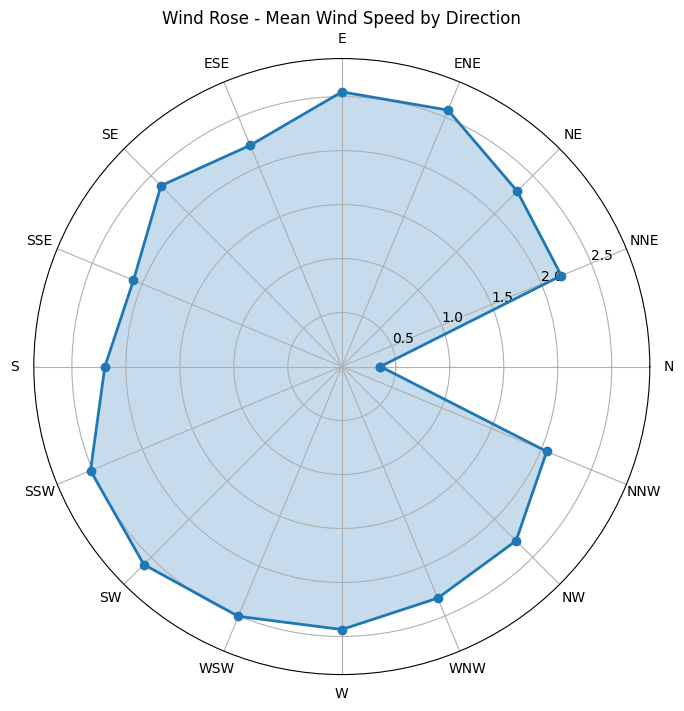

In [19]:


# Fix WD values: map 360 degrees to 0 (North)
df_togo_clean['WD_fixed'] = df_togo_clean['WD'].apply(lambda x: 0 if x == 360 else x)

# Define wind direction bins (16 compass points)
wd_bins = np.arange(-11.25, 360, 22.5)  # 17 edges, 16 bins
wd_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
             'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Bin the wind directions
df_togo_clean['WD_bin'] = pd.cut(df_togo_clean['WD_fixed'], bins=wd_bins, labels=wd_labels, right=False, include_lowest=True)

# Fill any NaNs (if any) with 'N'
df_togo_clean['WD_bin'] = df_togo_clean['WD_bin'].fillna('N')

# Group by direction bins and compute mean wind speed
wind_rose_data = df_togo_clean.groupby('WD_bin')['WS'].mean().reindex(wd_labels)

# Prepare data for polar plot
angles = np.linspace(0, 2 * np.pi, len(wd_labels), endpoint=False).tolist()
angles += angles[:1]  # close the plot

values = wind_rose_data.tolist()
values += values[:1]  # close the plot

# Plot Wind Rose
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(wd_labels)
ax.set_title('Wind Rose - Mean Wind Speed by Direction')
ax.set_ylim(0, max(values) * 1.1)

plt.show()


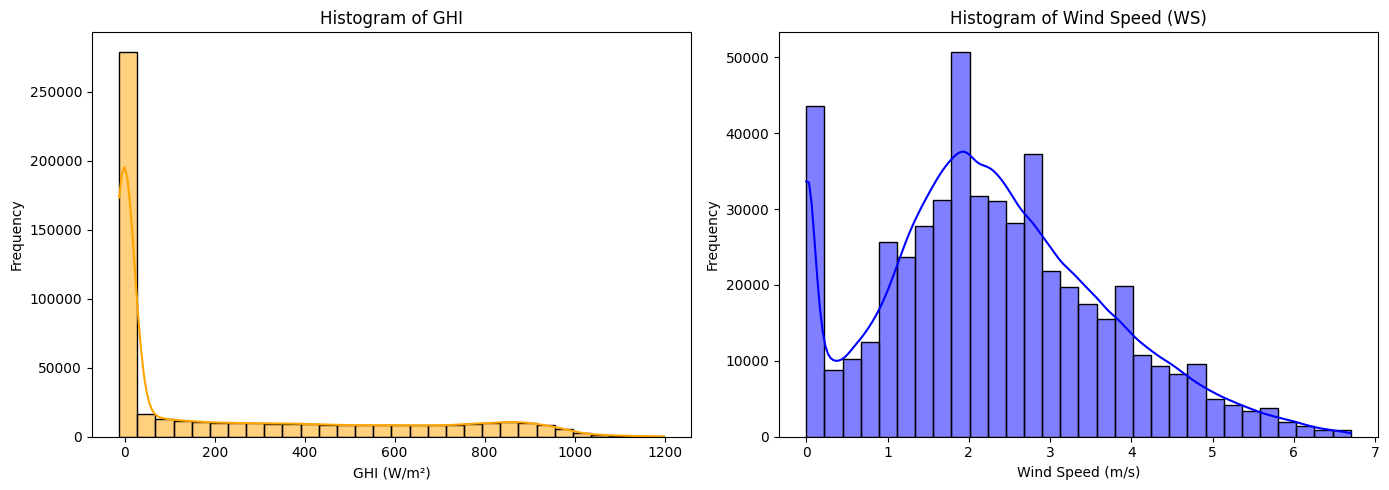

In [20]:


plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df_togo_clean['GHI'], bins=30, kde=True, color='orange')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_togo_clean['WS'], bins=30, kde=True, color='blue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


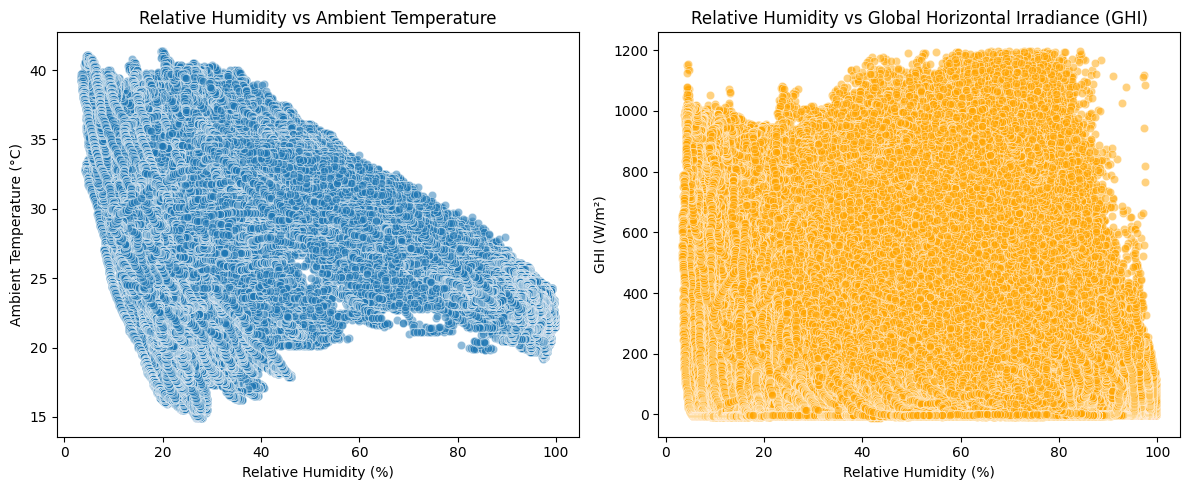

In [21]:


plt.figure(figsize=(12,5))

# RH vs Temperature
plt.subplot(1,2,1)
sns.scatterplot(data=df_togo_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

# RH vs GHI (Solar Radiation)
plt.subplot(1,2,2)
sns.scatterplot(data=df_togo_clean, x='RH', y='GHI', alpha=0.5, color='orange')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()


In [22]:
corr = df_togo_clean[['RH', 'Tamb', 'GHI']].corr()
print("Correlation matrix:\n", corr)


Correlation matrix:
             RH     Tamb       GHI
RH    1.000000 -0.39505 -0.247599
Tamb -0.395050  1.00000  0.563810
GHI  -0.247599  0.56381  1.000000


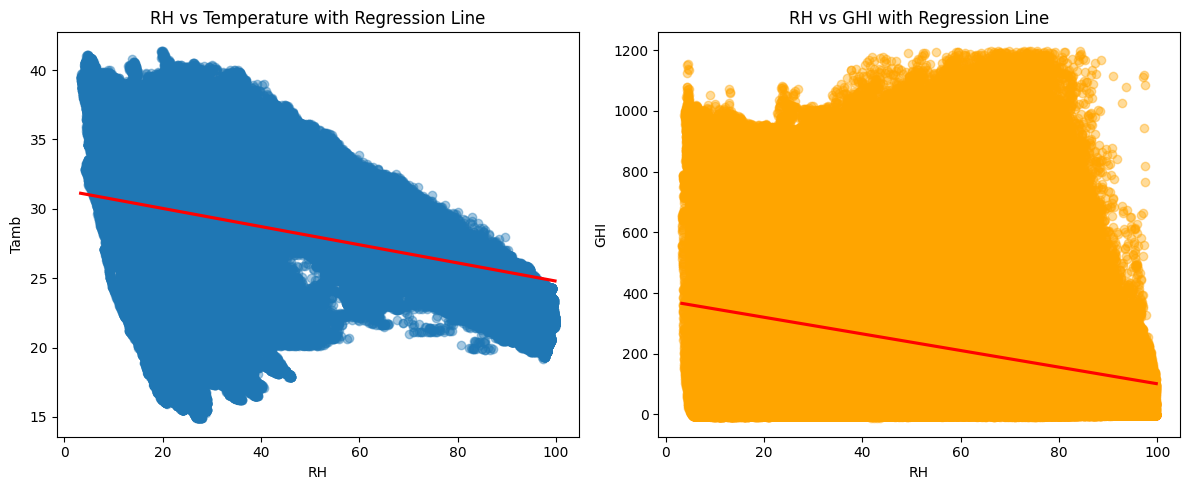

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(data=df_togo_clean, x='RH', y='Tamb', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('RH vs Temperature with Regression Line')

plt.subplot(1,2,2)
sns.regplot(data=df_togo_clean, x='RH', y='GHI', scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, color='orange')
plt.title('RH vs GHI with Regression Line')

plt.tight_layout()
plt.show()


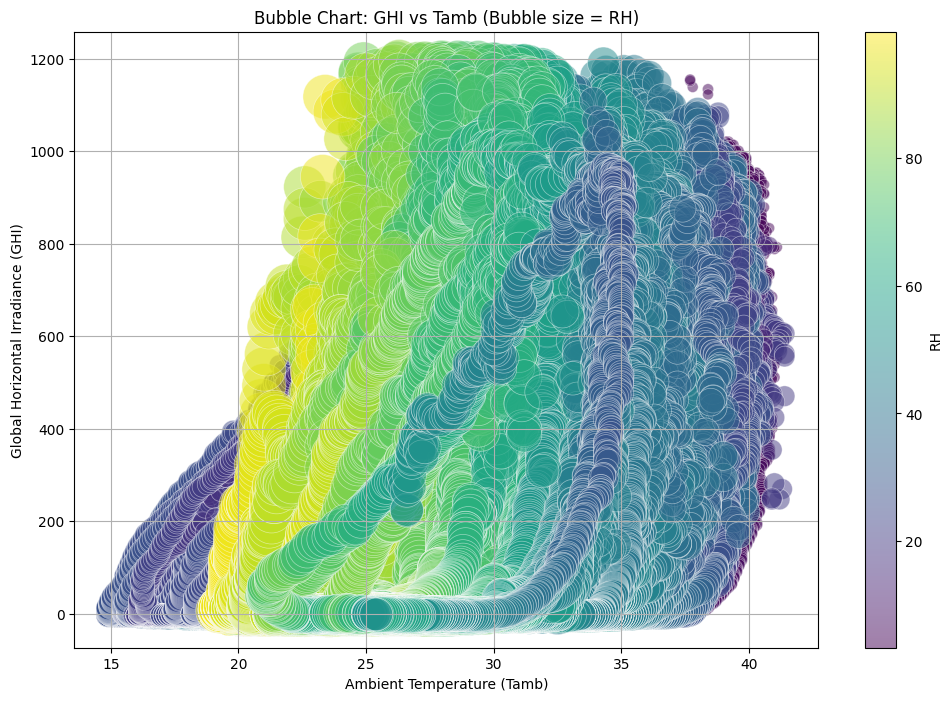

In [24]:
plt.figure(figsize=(12,8))

# Choose bubble size column: 'RH' or 'BP'
bubble_size_col = 'RH'  # change to 'BP' if you want

# Normalize bubble sizes for better visualization
sizes = df_togo_clean[bubble_size_col]
sizes_norm = (sizes - sizes.min()) / (sizes.max() - sizes.min()) * 1000 + 50  # scale sizes

plt.scatter(df_togo_clean['Tamb'], df_togo_clean['GHI'], 
            s=sizes_norm, alpha=0.5, 
            c=df_togo_clean[bubble_size_col], cmap='viridis', edgecolors='w', linewidth=0.5)

plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title(f'Bubble Chart: GHI vs Tamb (Bubble size = {bubble_size_col})')

cbar = plt.colorbar()
cbar.set_label(bubble_size_col)

plt.grid(True)
plt.show()
